In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
with open("../timestamps.log","rb") as f:
    contents=f.readlines()

In [4]:
print(contents)

[b'matplotlib data path: /home/pi/.ev3-venv/lib/python3.11/site-packages/matplotlib/mpl-data\n', b'CONFIGDIR=/home/pi/.config/matplotlib\n', b'interactive is False\n', b'platform is linux\n', b'CACHEDIR=/home/pi/.cache/matplotlib\n', b'Using fontManager instance from /home/pi/.cache/matplotlib/fontlist-v330.json\n', b'read\t0.006998\n', b'get_motor_movement\t0.014194\n', b'get_error_ellipse\t0.000741\n', b'get_robot_pose\t0.001145\n', b'to_tf\t0.000376\n', b'to_tf\t0.007757\n', b'to_tf\t0.000243\n', b'to_tf\t0.000164\n', b'to_tf\t0.000202\n', b'to_tf\t0.000250\n', b'to_tf\t0.000267\n', b'to_tf\t0.000290\n', b'to_tf\t0.000296\n', b'to_tf\t0.000289\n', b'to_tf\t0.000592\n', b'detect_arucos\t0.191131\n', b'find_centroids\t0.024603\n', b'detect_circle\t0.033532\n', b'find_centroids\t0.025120\n', b'detect_circle\t0.025467\n', b'detect_circles\t0.059394\n', b'detections\t0.251128\n', b'get_landmark_ids\t0.000004\n', b'get_landmark_poses\t0.000009\n', b'run_ekf_slam\t0.267608\n', b'parse_keyp

In [28]:
contents=[line.decode().strip() for line in contents[int(3*len(contents)/4):-5]]

In [29]:
splitted = [lines.split(" ") for lines in contents if not lines.startswith("Land") and
            not lines.startswith("⚠") and
            not lines.startswith('---') and
            not lines.startswith('***') and
            not lines.startswith('MODE') and
            not lines.startswith("Stoppin") and
            not lines.startswith("END") and
            not lines.startswith("I") and
                        not lines.startswith("Entering") and
            not lines.startswith("angle") and
            not lines.startswith("abs") and
            not lines.startswith("Switch") and
            not lines.startswith("Preparing") and
            not lines.startswith("Computing") and

            not lines.startswith('Saved') and
            not lines.startswith('cam_fps') and
            not lines.startswith('speed')]

In [30]:
times=[float(split[0]) for split in splitted]
actions=[split[2] for split in splitted]

In [31]:
actions=np.array(actions)
times=np.array(times)

In [32]:
times_dic={}
unique_actions=np.unique(actions)
for u_ac in unique_actions:
    mask=(actions==u_ac)
    # print(mask)
    # print(times[mask])
    # plt.plot(times[mask])
    times_dic[str(u_ac)]=times[mask]

In [33]:
tempos=[]
errs=[]
for a,b in times_dic.items():
    height=np.mean(b)
    tempos.append(height)
    errs.append(np.std(b))

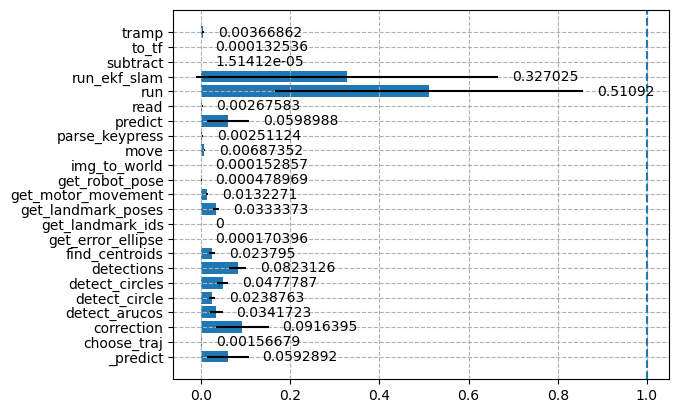

In [34]:
cc=plt.barh(list(times_dic.keys()), tempos, xerr=errs)
plt.bar_label(cc, padding=10)
plt.axvline(1, linestyle='dashed')
plt.grid(linestyle='dashed')
plt.show()
# plt.errorbar(list(times_dic.keys()), tempos, xerr=errs, fmt="o", color="r")